## All event Data meta

In [13]:
library(ggplot2)
library(plyr)
library(scales)
library(dplyr)
library(stringr)
library(RColorBrewer)
library(httr)
library(tidyr)
library(psych)




Attaching package: ‘psych’

The following objects are masked from ‘package:scales’:

    alpha, rescale

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



subject,year,count,percentage,sum
copper,2006,32,79,5255
silver,2006,4176,79,5255


In [11]:
load("../data/2018-10-08_all_meta.Rda",verbose=TRUE)
print((meta$registrants$years[1]))

registrants <- meta$registrants
citation_types <- meta$`citation-types`
relation_types <- meta$`relation-types`
pairings <- meta$pairings


Loading objects:
  meta
[[1]]
    id title     sum
1 2015  2015 1534156
2 2016  2016 2115807
3 2017  2017 1754042
4 2018  2018 2293376



# Types Distribution

In [18]:
hundred_plot<-function(types){
    print(summary(types$count))
    print(describe(types$count))
    fill <- c("#5F9EA0", "#E1B372", "#E1B373", "#E1B374", "#E1B375", "#E1B376", "#E1B377", "#E1B379", "#E1B379", "#E1B379")
    p4 <- ggplot() + geom_bar(aes(y = percentage, x = column, fill = type), data = (types),
                               stat="identity", colour="white")   + labs(x="Type", y="Percentage") +
      scale_y_continuous(labels = dollar_format(suffix = "%", prefix = ""))  + 
      ggtitle("DOI-DOI Links by Type (%)") 
    p4 + coord_flip() + theme(
                   plot.margin = unit(c(5,0,5,2), "cm")) 

    #https://stackoverflow.com/questions/34399760/change-color-for-specific-variable-r-ggplot-stacked-bar-chart
}


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     32     673    3032  272506   79660 8100981 
   vars  n     mean      sd median  trimmed    mad min     max   range skew
X1    1 36 272505.6 1344260 3032.5 38177.07 4447.8  32 8100981 8100949 5.48
   kurtosis       se
X1    28.95 224043.3


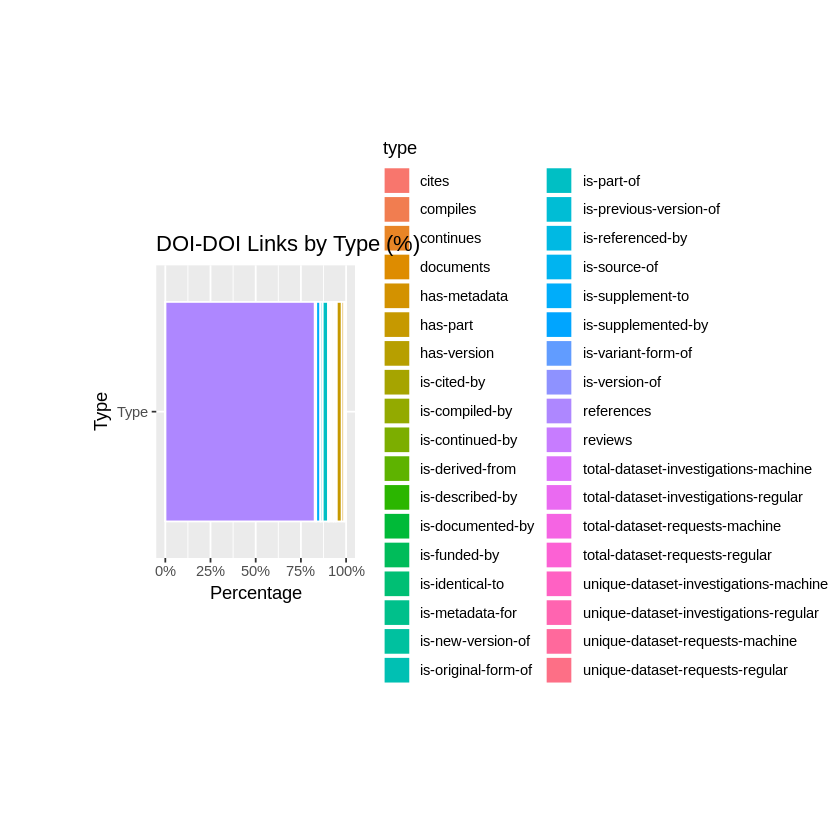

In [19]:

types <- relation_types %>%   
        mutate(total = sum(count), percentage = (count/total)*100, type=title, column="Type") %>%
        arrange(desc(total))
hundred_plot(types)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2      18     334  133629   10106 5600438 
   vars  n     mean       sd median trimmed    mad min     max   range skew
X1    1 50 133628.8 792453.3  333.5 4601.52 491.48   2 5600438 5600436 6.56
   kurtosis       se
X1     42.3 112069.8


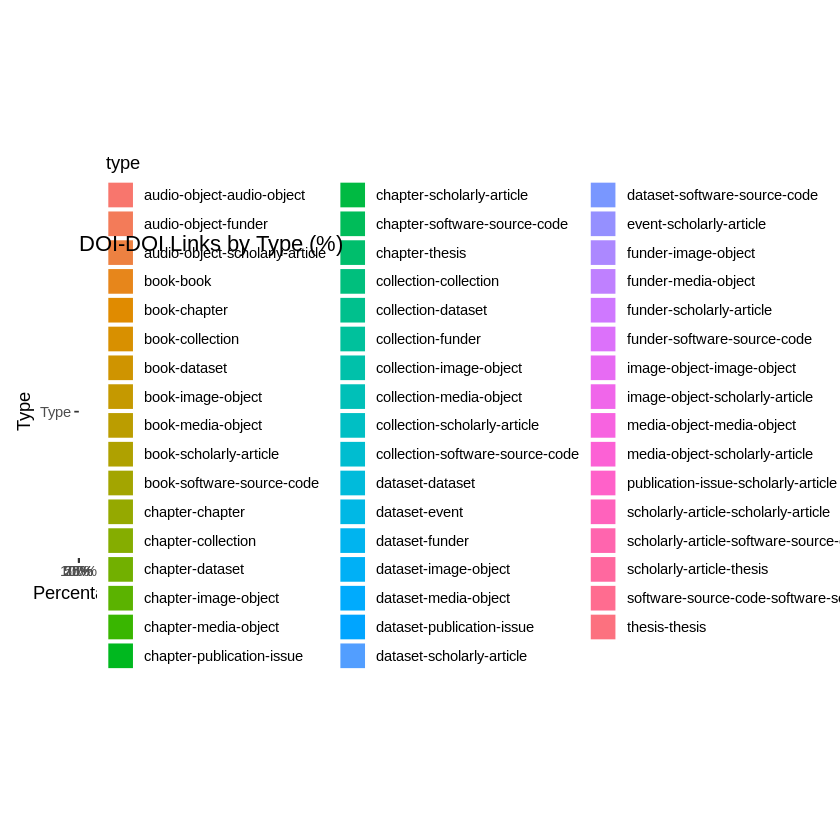

In [20]:

citation_types_ss <- citation_types %>%   
        mutate(total = sum(count), percentage = (count/total)*100, type=title, column="Type") %>%
        arrange(desc(total))
hundred_plot(citation_types_ss)